# Turing Analytics

## Import required modules

In [87]:
# import required modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_fscore_support

## Load and view datasets

In [18]:
# Load datasets
cardio_alco_df = pd.read_csv('./cardio_alco.csv', delimiter=';')
# you can save the data into a new csv file
cardio_alco_df.to_csv("cardio_alco_df_v2.csv", index=False)

# output dataframes
print('Head of cardio_alco: ')
print(cardio_alco_df.head())

Head of cardio_alco: 
   id  alco
0  44     0
1  45     0
2  46     0
3  47     0
4  49     0


## Task 1
- __Question 1__: How much heavier is the group age with the highest average weight than the age group with the lowest weight?

In [5]:
# load the cardio_base.csv file
cardio_base_df = pd.read_csv('./cardio_base.csv')
cardio_base_df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
0,0,18393,2,168,62.0,110,80,1,0
1,1,20228,1,156,85.0,140,90,3,0
2,2,18857,1,165,64.0,130,70,3,0
3,3,17623,2,169,82.0,150,100,1,0
4,4,17474,1,156,56.0,100,60,1,0


In [9]:
# Assuming 'age' and 'weight' are columns in your DataFrame
age_column = 'age'
weight_column = 'weight'

# Calculate the average weight for each age group
average_weight_by_age = cardio_base_df.groupby(age_column)[weight_column].mean()

# Find the age group with the highest average weight
max_avg_weight_age = average_weight_by_age.idxmax()
max_avg_weight = average_weight_by_age.max()

# Find the age group with the lowest weight
min_avg_weight_age = average_weight_by_age.idxmin()
min_avg_weight = average_weight_by_age.min()

# Calculate the difference in average weight
weight_difference = max_avg_weight - min_avg_weight

# Calculate the percentage difference
percentage_difference = (weight_difference / min_avg_weight) * 100

# Print the results
print(f"The age group with the highest average weight is {max_avg_weight_age} years old "
      f"with an average weight of {max_avg_weight:.2f} kg.")
print(f"The age group with the lowest average weight is {min_avg_weight_age} years old "
      f"with an average weight of {min_avg_weight:.2f} kg.")
print(f"The difference in average weight is {weight_difference:.2f} kg.")
print(f"The percentage difference in average weight is {percentage_difference:.2f}%.")

The age group with the highest average weight is 15086 years old with an average weight of 165.00 kg.
The age group with the lowest average weight is 21582 years old with an average weight of 11.00 kg.
The difference in average weight is 154.00 kg.
The percentage difference in average weight is 1400.00%.


## Task 2
- __Question 2__: How tall are the tallest 1% of people

In [10]:
height_column = 'height'

# Sort the DataFrame by height in descending order
sorted_df = cardio_base_df.sort_values(by=height_column, ascending=False)

# Calculate the number of rows corresponding to the top 1% of people
total_rows = cardio_base_df.shape[0]
top_1_percent_rows = int(0.01 * total_rows)

# Extract the height of the tallest 1% of people
tallest_1_percent_heights = sorted_df.head(top_1_percent_rows)[height_column]

# Print the result
print(f"The height of the tallest 1% of people is:")
print(tallest_1_percent_heights)

The height of the tallest 1% of people is:
6486     250
21628    207
41901    200
8897     198
30127    198
        ... 
21182    184
59359    184
37162    184
69375    184
2862     184
Name: height, Length: 700, dtype: int64


### Qn. 2: Answer
They are taller than 184cm

### Task 3
- __Question 3__: What percentage of people are more than 2 standard deviations far from the average height?

In [12]:
height_column = 'height'

# Calculate the mean and standard deviation of the height
average_height = cardio_base_df[height_column].mean()
std_deviation = cardio_base_df[height_column].std()

# Identify people more than 2 standard deviations away from the mean
threshold = 2 * std_deviation
outliers = cardio_base_df[(cardio_base_df[height_column] > average_height + threshold) | 
                           (cardio_base_df[height_column] < average_height - threshold)]

# Calculate the percentage of outliers
percentage_outliers = (len(outliers) / len(cardio_base_df)) * 100

# Print the result
print(f"The percentage of people more than 2 standard deviations away from the average height is: {percentage_outliers:.2f}%.")

The percentage of people more than 2 standard deviations away from the average height is: 3.34%.


### Task 4
- __Question 4__: What percentage of population over 50 years old consume alcohol?
- __Remark__: Also, use the `cardio_alco.csv` file and merge the datasets on `ID`. Ignore those persons who have no alcohol consumption Information!

In [14]:
# Perform left join and select specific columns
result_df = pd.merge(cardio_alco_df[['id', 'alco']], cardio_base_df[['id', 'age']], on='id', how='left')
result_df.head()

# Calculate the percentage of the population over 50 years old who consume alcohol
over_50_alcohol_consumers = result_df[(result_df['age'] > 50) & (result_df['alco'] == 1)]
total_over_50_population = result_df[result_df['age'] > 50]

percentage_over_50_alcohol_consumers = (len(over_50_alcohol_consumers) / len(total_over_50_population)) * 100

print(f"Percentage of population over 50 years old who consume alcohol: {percentage_over_50_alcohol_consumers:.2f}%")

Percentage of population over 50 years old who consume alcohol: 5.34%


### Task 5
- Which of the following statements is true with 95% confidence?
    1. Smokers weight less than non-smokers?
    2. Men have higher blood pressure than women?
    3. Smokers have higher cholesterol level than non-smokers?
    4. Smokers have higher blood pressure than non-smokers?

In [15]:
## compare the weights of smokers and non-smokers
# Group by the 'smoke' field and calculate the mean weight for each group
average_weight_by_smoke = cardio_base_df.groupby('smoke')['weight'].mean()

# Display the result
print(average_weight_by_smoke)

smoke
0    73.902352
1    77.344351
Name: weight, dtype: float64


In [16]:
##  compare the average cholesterol levels of smokers and non-smokers
# Group by the 'smoke' field and calculate the mean cholesterol for each group
average_cholesterol_by_smoke = cardio_base_df.groupby('smoke')['cholesterol'].mean()

# Display the result
print(average_cholesterol_by_smoke)

smoke
0    1.364682
1    1.389528
Name: cholesterol, dtype: float64


### Task 6
- Second dataset, Covid19 cases.
- This datasetcontains daily covid19 cases for all countries in the world. Each row represents a calendar day. Rows also conntain simple Information about the countries, like
  1. population
  2. percentage of population over 65
  3. GDP, and
  4. hospital beds per thousand inhabitants.
- Use the dataset to answer the following questions:
  - **Question 6**
    - When did the difference in the total number of confirmed cases between Italy and Germany become more than 10,000?

In [19]:
# Read the dataset
covid_data_df = pd.read_csv('./covid_data.csv', parse_dates=['date'])
covid_data_df.head()

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
0,Afghanistan,2019-12-31,0,0,38928341.0,2.581,1803.987,0.5
1,Afghanistan,2020-01-01,0,0,38928341.0,2.581,1803.987,0.5
2,Afghanistan,2020-01-02,0,0,38928341.0,2.581,1803.987,0.5
3,Afghanistan,2020-01-03,0,0,38928341.0,2.581,1803.987,0.5
4,Afghanistan,2020-01-04,0,0,38928341.0,2.581,1803.987,0.5


In [51]:
# calculate the cumulative sum of `new_cases` per location and `date` in ascending order
covid_data_df['cumulative_new_cases'] = covid_data_df.sort_values(['location', 'date']).groupby('location')['new_cases'].cumsum()

# Sort the DataFrame by 'location' and 'date'
covid_data_df = covid_data_df.sort_values(['location', 'date'])
covid_data_df.head()

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand,cumulative_new_cases
0,Afghanistan,2019-12-31,0,0,38928341.0,2.581,1803.987,0.5,0
1,Afghanistan,2020-01-01,0,0,38928341.0,2.581,1803.987,0.5,0
2,Afghanistan,2020-01-02,0,0,38928341.0,2.581,1803.987,0.5,0
3,Afghanistan,2020-01-03,0,0,38928341.0,2.581,1803.987,0.5,0
4,Afghanistan,2020-01-04,0,0,38928341.0,2.581,1803.987,0.5,0


In [70]:
# Filter rows for Italy and Germany
italy_df = covid_data_df[covid_data_df['location'] == 'Italy'].reset_index(drop=True)  # create a new DataFrame
germany_df = covid_data_df[covid_data_df['location'] == 'Germany'].reset_index(drop=True) # create a new DataFrame

date_column = 'date'
new_cases_italy_column = 'cumulative_new_cases'  # Change to the actual column name in italy_df
new_cases_germany_column = 'cumulative_new_cases'  # Change to the actual column name in germany_df

# Merge the two DataFrames on the 'date' column
merged_df = pd.merge(italy_df, germany_df, on=date_column, how='inner', suffixes=('_Italy', '_Germany'))

# Select specific columns from the merged DataFrame
selected_columns = merged_df[['date', 'cumulative_new_cases_Italy', 'cumulative_new_cases_Germany']]

# Create a new DataFrame with selected columns
selected_columns = merged_df[['date', 'cumulative_new_cases_Italy', 'cumulative_new_cases_Germany']].copy()
selected_columns.loc[:, 'cumulative_cases_difference'] = (selected_columns['cumulative_new_cases_Italy'] - selected_columns['cumulative_new_cases_Germany']).abs()
# preview the new dataframe
selected_columns.head()


,date,cumulative_new_cases_Italy,cumulative_new_cases_Germany,cumulative_cases_difference
0,2019-12-31,0,0,0
1,2020-01-01,0,0,0
2,2020-01-02,0,0,0
3,2020-01-03,0,0,0
4,2020-01-04,0,0,0


In [80]:
dates_difference_10k = selected_columns[selected_columns['cumulative_cases_difference'] > 10000]

if not dates_difference_10k.empty:
    # Find the date when the difference becomes more than 10,000
    date_difference_10k = dates_difference_10k.loc[dates_difference_10k['cumulative_cases_difference'].idxmin(), 'date']
    print(f"The date when the difference in the total number of confirmed cases between Italy and Germany becomes more than 10,000 is: {date_difference_10k}")
else:
    print("There is no date where the difference exceeds 10,000.")

The date when the difference in the total number of confirmed cases between Italy and Germany becomes more than 10,000 is: 2020-03-12 00:00:00


### Task 7
- **Question 7**
  - Look at the cumulative number of confirmed cases in Italy between 2020-02-28 and 2020-03-20.
  - Fit an exponential function (y=Ae^(Bx)) to this set to express cumulative cases a function of days passed, by minimizing squared loss.
  - What is the difference between the exeponential curve and the total number of real cases on 2020-03-20

- To fit an exponential function to the cumulative number of confirmed cases in Italy between 2020-02-28 and 2020-03-20, and to calculate the difference between the exponential curve and the total number of real cases on 2020-03-20, you can use the following steps in Python with the help of the scipy.optimize module for curve fitting:

In [81]:
covid_data_df.head()

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand,cumulative_new_cases
0,Afghanistan,2019-12-31,0,0,38928341.0,2.581,1803.987,0.5,0
1,Afghanistan,2020-01-01,0,0,38928341.0,2.581,1803.987,0.5,0
2,Afghanistan,2020-01-02,0,0,38928341.0,2.581,1803.987,0.5,0
3,Afghanistan,2020-01-03,0,0,38928341.0,2.581,1803.987,0.5,0
4,Afghanistan,2020-01-04,0,0,38928341.0,2.581,1803.987,0.5,0


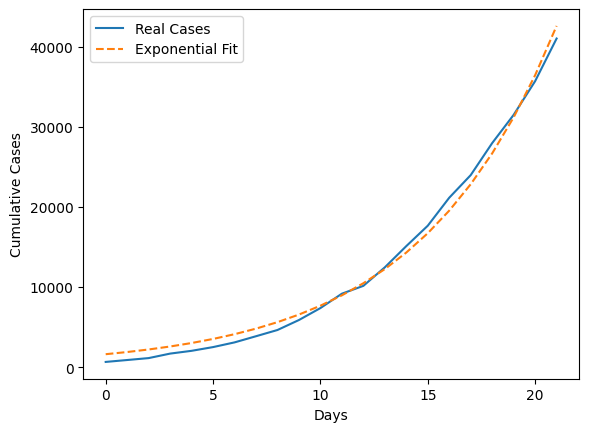

Difference between the exponential curve and real cases on 2020-03-20: 1573.5067847222672


In [83]:
italy_data = covid_data_df[(covid_data_df['location'] == 'Italy') & (covid_data_df['date'] >= '2020-02-28') & (covid_data_df['date'] <= '2020-03-20')]

# Sort the data by date in ascending order
italy_data = italy_data.sort_values('date')

# Calculate the number of days passed between consecutive rows
italy_data['days_passed'] = (italy_data['date'] - italy_data['date'].shift(1)).dt.days.fillna(0)

# Extracting relevant data for curve fitting
x_days = italy_data['days_passed'].cumsum().values
y_cumulative_cases = italy_data['cumulative_new_cases'].values

# Define the exponential function
def exponential_func(x, A, B):
    return A * np.exp(B * x)

# Fit the exponential function to the data
params, covariance = curve_fit(exponential_func, x_days, y_cumulative_cases)

# Calculate the fitted values using the obtained parameters
y_fit = exponential_func(x_days, *params)

# Plotting the data and the fitted exponential curve
plt.plot(x_days, y_cumulative_cases, label='Real Cases')
plt.plot(x_days, y_fit, label='Exponential Fit', linestyle='--')
plt.xlabel('Days')
plt.ylabel('Cumulative Cases')
plt.legend()
plt.show()

# Calculate the difference between the exponential curve and the real cases on 2020-03-20
day_2020_03_20 = (pd.to_datetime('2020-03-20') - pd.to_datetime('2020-02-28')).days
real_cases_2020_03_20 = y_cumulative_cases[x_days == day_2020_03_20][0]
exponential_curve_2020_03_20 = exponential_func(day_2020_03_20, *params)
difference = exponential_curve_2020_03_20 - real_cases_2020_03_20

print(f"Difference between the exponential curve and real cases on 2020-03-20: {difference}")

### Task 8
- **Question 8**
  - Which country has the 3rd highest death rate?
  - Death Rate = Total number of deaths per million inhabitants

- To find the country with the third-highest death rate (calculated as the total number of deaths per million inhabitants), you can follow these steps:

    - Calculate the total number of deaths per million inhabitants for each country.
    - Sort the countries based on the death rate in descending order.
    - Identify the country with the third-highest death rate.

In [84]:
# Calculate the total number of deaths per million inhabitants
covid_data_df['death_rate'] = (covid_data_df['new_deaths'] / covid_data_df['population']) * 1_000_000

# Group by country and sum the death rates
total_death_rate_by_country = covid_data_df.groupby('location')['death_rate'].sum()

# Sort countries based on death rate in descending order
sorted_countries = total_death_rate_by_country.sort_values(ascending=False)

# Get the country with the third-highest death rate
third_highest_country = sorted_countries.index[2]

print(f"The country with the third-highest death rate is: {third_highest_country}")

The country with the third-highest death rate is: Andorra


### Task 9

- **Question 9**
   - What is the F1 score of the following statements?
   - Countries where more than 20% of the population is over 65 years old, have death rates over 50 per million inhabitants.
   - Ignore countries where any of the necessary Information is missing.

- To calculate the F1 score for the statement provided, you need to consider the true positives (countries meeting the condition), false positives (countries incorrectly classified as meeting the condition), false negatives (countries meeting the condition but not classified as such), and true negatives (countries correctly classified as not meeting the condition). Given the statement:

  - Statement: Countries where more than 20% of the population is over 65 years old have death rates over 50 per million inhabitants.
  - You can create a binary classification based on this statement and compare it with the actual data. Here's an example code snippet in Python using scikit-learn:

In [93]:
# Define a binary classification based on the statement
covid_data_df['predicted_condition'] = (
    (covid_data_df['aged_65_older_percent'] > 20) & 
    (covid_data_df['death_rate'] > 50)
).astype(int)

# Define the actual condition based on the statement
covid_data_df['actual_condition'] = (
    (covid_data_df['aged_65_older_percent'] > 20) & 
    (covid_data_df['death_rate'] > 50)
).astype(int)

# Calculate precision, recall, and F1 score with zero_division=1
precision, recall, f1, _ = precision_recall_fscore_support(
    covid_data_df['actual_condition'], 
    covid_data_df['predicted_condition'], 
    average='binary',
    pos_label=1,  # Assuming the positive class is when the condition is met
    zero_division=1
)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Precision: 1.00
Recall: 1.00
F1 Score: 1.00


### Task 10
- __Question__:
  - Calculate Spearman Rank correlation
  - Identify two features with the highest spearman rank correlation

In [53]:
# correlation coefficient
cardio_base_corr = cardio_base_df.corr(method='spearman')
# Print the result
print("Spearman Rank Correlation:")
print(cardio_base_corr)

Spearman Rank Correlation:
                   id       age    gender    height    weight     ap_hi  \
id           1.000000  0.002682  0.003506 -0.001886 -0.001292  0.003258   
age          0.002682  1.000000 -0.020176 -0.082292  0.061559  0.219087   
gender       0.003506 -0.020176  1.000000  0.533805  0.172480  0.063174   
height      -0.001886 -0.082292  0.533805  1.000000  0.313569  0.019381   
weight      -0.001292  0.061559  0.172480  0.313569  1.000000  0.277749   
ap_hi        0.003258  0.219087  0.063174  0.019381  0.277749  1.000000   
ap_lo       -0.000238  0.156700  0.066374  0.030534  0.254420  0.735436   
cholesterol  0.005706  0.140113 -0.035730 -0.058940  0.137908  0.208722   
smoke       -0.003697 -0.047471  0.338135  0.197632  0.071676  0.028929   

                ap_lo  cholesterol     smoke  
id          -0.000238     0.005706 -0.003697  
age          0.156700     0.140113 -0.047471  
gender       0.066374    -0.035730  0.338135  
height       0.030534    -0.058940

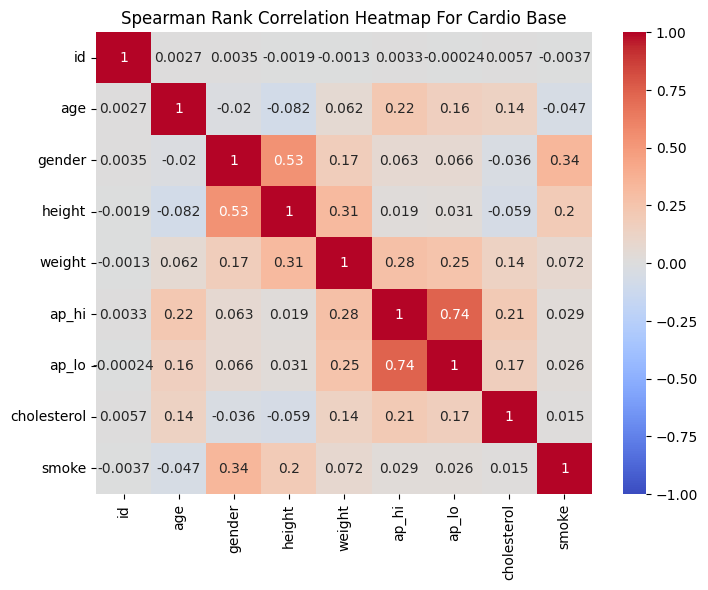

In [96]:
# Calculate Spearman rank correlation
spearman_corr = cardio_base_df.corr(method='spearman')

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Spearman Rank Correlation Heatmap For Cardio Base')
plt.show()

### Task 11
- Question 11:
  - To calculate the probability that a country has a GDP of over $10,000 given that they have at least 5 hospital beds per 1000 inhabitants, you can use conditional probability. The conditional probability is calculated as the probability of the intersection of the two events divided by the probability of the condition.

In [102]:
# Define the condition
condition = (covid_data_df['hospital_beds_per_thousand'] >= 5)

# Calculate the probability of having at least 5 hospital beds
prob_condition = condition.mean()

# Calculate the probability of having GDP over $10,000 given the condition
prob_gdp_given_condition = (covid_data_df[condition]['gdp_per_capita'] > 10000).mean()

# Calculate the conditional probability
conditional_probability = prob_gdp_given_condition / prob_condition

print(f"The probability of having GDP over $10,000 given at least 5 hospital beds per 1000 inhabitants is: {conditional_probability:.2%}")

The probability of having GDP over $10,000 given at least 5 hospital beds per 1000 inhabitants is: 565.03%
